In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Read Mnist data set

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
train  (55000, 784)
validation  (5000, 784)
test  (10000, 784)
What is mnist <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
what is mnist.train.images <class 'numpy.ndarray'>
The digit should be 0


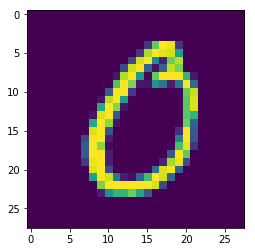

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist.train/validation/test.images/labels 
print ("train ", mnist.train.images.shape)
print ("validation ", mnist.validation.images.shape)
print ("test ", mnist.test.images.shape)

print ("What is mnist", type(mnist))
print ("what is mnist.train.images", type(mnist.train.images))

nth=888
print ("The digit should be", mnist.train.labels[nth].tolist().index(1))

#plt.imshow(mnist.train.images[nth].reshape(28,28))
plt.imshow(mnist.train.images[nth].reshape(28,28))

#Comments: mnist.train.labels[nth] is the label for nth image, but it
#is a ndarray, which to turn into a list, for which we print out the
#position when the value is 1 (because we know there is only one item in
#the list with value 1 and the rests are all zeros)



# Multilayer DNN

### Reference:
#### builed your first NN with TF: http://adventuresinmachinelearning.com/python-tensorflow-tutorial/
#### save entire model: https://stackoverflow.com/questions/50215301/tensorflow-how-to-use-pretrained-weights-in-new-graph

In [11]:
# build 2-hidden-layer NN and save the entire model

# start save entire model
tf.reset_default_graph()

#set layer neurons and learning rate
H1_N = 100
H2_N=30
H3_N=30
H4_N=30
H5_N=30
H6_N=30
H7_N=30
H8_N=30
H9_N = 30

learning_rate = 0.05

# declare the basic structure of the data
x  = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

x_image = tf.reshape(x, [-1,28,28,1])
print ("x_image=", x_image)

def weight_variable(shape, index):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, index)

def bias_variable(shape, index):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, index)

# build the NN 
# first layer
W_N1 = weight_variable(shape = [784,H1_N], index = 'W_N1')
b_N1 = bias_variable(shape = [H1_N], index = 'b_N1')
h_fc1 = tf.nn.relu(tf.matmul(x, W_N1) + b_N1)

# second layer
W_N2 = weight_variable(shape = [H1_N,H2_N], index = 'W_N2')
b_N2 = bias_variable(shape = [H2_N], index = 'b_N2')
h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_N2) + b_N2) 

W_N3 = weight_variable(shape = [H2_N,H3_N], index = 'W_N3')
b_N3 = bias_variable(shape = [H3_N], index = 'b_N3')
h_fc3 = tf.nn.relu(tf.matmul(h_fc2, W_N3) + b_N3) 

W_N4 = weight_variable(shape = [H3_N,H4_N], index = 'W_N4')
b_N4 = bias_variable(shape = [H4_N], index = 'b_N4')
h_fc4 = tf.nn.relu(tf.matmul(h_fc3, W_N4) + b_N4) 


W_N5 = weight_variable(shape = [H4_N,H5_N], index = 'W_N5')
b_N5 = bias_variable(shape = [H5_N], index = 'b_N5')
h_fc5 = tf.nn.relu(tf.matmul(h_fc4, W_N5) + b_N5) 

W_N6 = weight_variable(shape = [H5_N,H6_N], index = 'W_N6')
b_N6 = bias_variable(shape = [H6_N], index = 'b_N6')
h_fc6 = tf.nn.relu(tf.matmul(h_fc5, W_N6) + b_N6) 


W_N7 = weight_variable(shape = [H6_N,H7_N], index = 'W_N7')
b_N7 = bias_variable(shape = [H7_N], index = 'b_N7')
h_fc7 = tf.nn.relu(tf.matmul(h_fc6, W_N7) + b_N7) 

W_N8 = weight_variable(shape = [H7_N,H8_N], index = 'W_N8')
b_N8 = bias_variable(shape = [H8_N], index = 'b_N8')
h_fc8 = tf.nn.relu(tf.matmul(h_fc7, W_N8) + b_N8) 



W_N9 = weight_variable(shape = [H8_N,H9_N], index = 'W_N9')
b_N9 = bias_variable(shape = [H9_N], index = 'b_N9')
h_fc9 = tf.nn.relu(tf.matmul(h_fc8, W_N9) + b_N9) 



#output layer
W_N10 = weight_variable(shape = [H9_N,10], index = 'W_N10')
b_N10 = bias_variable(shape = [10], index = 'b_N10')
y = tf.nn.softmax(tf.matmul(h_fc9, W_N10) + b_N10)

# loss
#cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_*tf.log(y),1))
y_clipped = tf.clip_by_value(y, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y_clipped)
                         + (1 - y_) * tf.log(1 - y_clipped), axis=1))
correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1)) # y=(m*c) so axis=1 along c
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# training cycles
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

print ("Step     Loss       Train  Test")
for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(50) # mini-batch
    train_step.run(feed_dict={x: batch_xs, y_: batch_ys})
    if i==0 or (i+1)%2000 == 0 :
        loss = cross_entropy.eval(feed_dict={ x:mnist.validation.images, y_: mnist.validation.labels})
        train_accuracy = accuracy.eval(feed_dict={ x:batch_xs, y_: batch_ys})
        test_accuracy = accuracy.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels})
        print("Step %d : %.3f  %.2f  %.3f" %((i+1), loss, train_accuracy, test_accuracy ))

        
# save the trained entire model
#so that we can retrive weights and neurons from each layer to do Loss Landscape and evaluate correlation
saver = tf.train.Saver()
saver.save(sess, save_path='./DNN_well_trained.ckpt')

x_image= Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
Step     Loss       Train  Test
Step 1 : 3.254  0.10  0.107
Step 2000 : 2.839  0.28  0.205
Step 4000 : 0.893  0.82  0.847
Step 6000 : 0.408  0.96  0.937
Step 8000 : 0.532  0.88  0.871
Step 10000 : 0.237  0.96  0.962
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'W_N1' has type str, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'W_N1' has type str, but expected one of: int, long, bool


'./DNN_well_trained.ckpt'

In [12]:
#retrive weights from first layer
print(W_N1.eval())

[[ 0.01933206 -0.07777078  0.0226952  ... -0.05105474  0.01485464
  -0.10404602]
 [ 0.09607971  0.17190938  0.04294607 ... -0.05196551  0.05447055
  -0.00328382]
 [ 0.05610756 -0.03874415  0.0298878  ...  0.08453869  0.06929581
   0.08902828]
 ...
 [-0.0864618   0.00711516 -0.18319274 ...  0.02778511 -0.0230544
  -0.1351587 ]
 [-0.18106215  0.05055091 -0.00610265 ...  0.19349927 -0.14750764
  -0.13291715]
 [-0.04158011 -0.06128183 -0.0594813  ...  0.06691134  0.04793641
  -0.03213802]]


In [13]:
#retrive hidden-neurons from first layer
print(h_fc1.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels }))

[[0.8979705  0.8356203  3.603221   ... 0.         0.         2.5322154 ]
 [0.         0.         0.         ... 0.         2.0258768  0.        ]
 [0.         0.9233463  0.         ... 0.         0.         0.59668887]
 ...
 [0.         0.7239499  1.5392722  ... 0.         0.         1.445068  ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [1.7956433  0.22404872 0.         ... 0.         0.         1.9337718 ]]


# Loss Landscape  1D|2D

### 1D Linear Loss Function Explanation
#### --------------------------------------------------------------------
#### θα = (1 − α)θi + αθf 
#### θi as the randomly assigned <font color=red>initial</font> weights,  θf the final <font color=red>well-trained</font> model weights in Part (1) above
#### That means for <font color=red>α from 0 to 1, θα change from θi to θf</font>
<br>
#### f(θ) = Loss(θα)
##### Correspondingly, When θα change from θi to θf, Loss(θα) change from high to low
#### With sufficient <font color=red>(α,f(α)) points</font>, we can display the loss function in 1D space.

<br>
<br>
####  <font color=red>The Loss Landscape is to show the how Loss changes when Weights Change.</font>👇👇
#### If the θf we found is the best, then we should get minimum loss when α=1. But in reality,  <font color=red>that's not often the case.</font>
![image.png](attachment:image.png)




In [15]:
# start a new saver
tf.reset_default_graph()

# redefine the model, because you don't do part I and part II together all the time, especially when you want to 
# run plot section in new file

#set layer neurons and learning rate
H1_N = 100
H2_N=30
H3_N=30
H4_N=30
H5_N=30
H6_N=30
H7_N=30
H8_N=30
H9_N = 30
learning_rate = 0.05

# declare the basic structure of the data
x  = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

def weight_variable(shape, index):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, index)

def bias_variable(shape, index):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, index)

# build the NN 
# first layer
W_N1 = weight_variable(shape = [784,H1_N], index = 'W_N1')
b_N1 = bias_variable(shape = [H1_N], index = 'b_N1')
h_fc1 = tf.nn.relu(tf.matmul(x, W_N1) + b_N1)

# second layer
W_N2 = weight_variable(shape = [H1_N,H2_N], index = 'W_N2')
b_N2 = bias_variable(shape = [H2_N], index = 'b_N2')
h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_N2) + b_N2) 

W_N3 = weight_variable(shape = [H2_N,H3_N], index = 'W_N3')
b_N3 = bias_variable(shape = [H3_N], index = 'b_N3')
h_fc3 = tf.nn.relu(tf.matmul(h_fc2, W_N3) + b_N3) 

W_N4 = weight_variable(shape = [H3_N,H4_N], index = 'W_N4')
b_N4 = bias_variable(shape = [H4_N], index = 'b_N4')
h_fc4 = tf.nn.relu(tf.matmul(h_fc3, W_N4) + b_N4) 


W_N5 = weight_variable(shape = [H4_N,H5_N], index = 'W_N5')
b_N5 = bias_variable(shape = [H5_N], index = 'b_N5')
h_fc5 = tf.nn.relu(tf.matmul(h_fc4, W_N5) + b_N5) 

W_N6 = weight_variable(shape = [H5_N,H6_N], index = 'W_N6')
b_N6 = bias_variable(shape = [H6_N], index = 'b_N6')
h_fc6 = tf.nn.relu(tf.matmul(h_fc5, W_N6) + b_N6) 


W_N7 = weight_variable(shape = [H6_N,H7_N], index = 'W_N7')
b_N7 = bias_variable(shape = [H7_N], index = 'b_N7')
h_fc7 = tf.nn.relu(tf.matmul(h_fc6, W_N7) + b_N7) 

W_N8 = weight_variable(shape = [H7_N,H8_N], index = 'W_N8')
b_N8 = bias_variable(shape = [H8_N], index = 'b_N8')
h_fc8 = tf.nn.relu(tf.matmul(h_fc7, W_N8) + b_N8) 



W_N9 = weight_variable(shape = [H8_N,H9_N], index = 'W_N9')
b_N9 = bias_variable(shape = [H9_N], index = 'b_N9')
h_fc9 = tf.nn.relu(tf.matmul(h_fc8, W_N9) + b_N9) 



#output layer
W_N10 = weight_variable(shape = [H9_N,10], index = 'W_N10')
b_N10 = bias_variable(shape = [10], index = 'b_N10')
y = tf.nn.softmax(tf.matmul(h_fc9, W_N10) + b_N10)

# loss
y_clipped = tf.clip_by_value(y, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y_clipped)
                         + (1 - y_) * tf.log(1 - y_clipped), axis=1))
correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1)) # y=(m*c) so axis=1 along c
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#save the model structure and retrive weights from well trained model in Part I
saver = tf.train.Saver()
sess = tf.InteractiveSession()
saver.restore(sess, "./DNN_well_trained.ckpt")

# print the Loss, Train Accuracy, Test Accuracy of saved well-trained model
loss0 = cross_entropy.eval(feed_dict={ x:mnist.validation.images, y_: mnist.validation.labels})
train_accuracy = accuracy.eval(feed_dict={ x:batch_xs, y_: batch_ys})
test_accuracy = accuracy.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels})
print('       Loss,  Train, Test')
print("Step : %.3f  %.2f  %.3f" %( loss0, train_accuracy, test_accuracy ))

# retrive weights(θ′), the best(final) weights we found for now
w1_0 = W_N1.eval();  b1_0 = b_N1.eval()
w2_0 = W_N2.eval();  b2_0 = b_N2.eval()
w3_0 = W_N3.eval();  b3_0 = b_N3.eval()
w4_0 = W_N4.eval();  b4_0 = b_N4.eval()
w5_0 = W_N5.eval();  b5_0 = b_N5.eval()
w6_0 = W_N6.eval();  b6_0 = b_N6.eval()
w7_0 = W_N7.eval();  b7_0 = b_N7.eval()
w8_0 = W_N8.eval();  b8_0 = b_N8.eval()
w9_0 = W_N9.eval();  b9_0 = b_N9.eval()
w10_0 = W_N10.eval();  b10_0 = b_N10.eval()


#print (type(w10_0), np.shape(w10_0))
#print(w10_0)

INFO:tensorflow:Restoring parameters from ./DNN_well_trained.ckpt
       Loss,  Train, Test
Step : 0.237  0.96  0.962


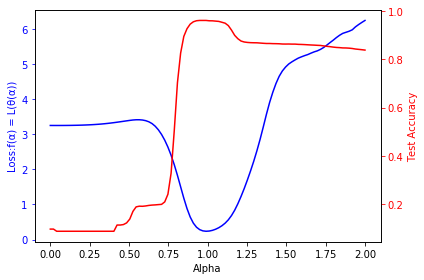

In [17]:
# θ(α) = (1 − α)θ + αθ′
# f(α) = L(θ(α))

# specify initialize weights(θ)
mu, sigma = 0, 0.1 # mean and standard deviation for Gaussian distribution
r1_w1 = np.random.normal(mu, sigma, np.shape(w1_0))
r1_w2 = np.random.normal(mu, sigma, np.shape(w2_0))
r1_w3 = np.random.normal(mu, sigma, np.shape(w3_0))
r1_w4 = np.random.normal(mu, sigma, np.shape(w4_0))
r1_w5 = np.random.normal(mu, sigma, np.shape(w5_0))
r1_w6 = np.random.normal(mu, sigma, np.shape(w6_0))
r1_w7 = np.random.normal(mu, sigma, np.shape(w7_0))
r1_w8 = np.random.normal(mu, sigma, np.shape(w8_0))
r1_w9 = np.random.normal(mu, sigma, np.shape(w9_0))
r1_w10 = np.random.normal(mu, sigma, np.shape(w10_0))
r1_b = np.random.normal(mu, sigma, np.shape(b1_0)) 
r1_b2 = np.random.normal(mu, sigma, np.shape(b2_0)) 
r1_b3 = np.random.normal(mu, sigma, np.shape(b3_0))
r1_b4 = np.random.normal(mu, sigma, np.shape(b4_0))
r1_b5 = np.random.normal(mu, sigma, np.shape(b5_0))
r1_b6 = np.random.normal(mu, sigma, np.shape(b6_0))
r1_b7 = np.random.normal(mu, sigma, np.shape(b7_0))
r1_b8 = np.random.normal(mu, sigma, np.shape(b8_0))
r1_b9 = np.random.normal(mu, sigma, np.shape(b9_0))
r1_b10 = np.random.normal(mu, sigma, np.shape(b10_0))







# specify alpha
alpha_list = np.linspace(0, 2, 100)

# loop
loss_list = []
train_acc_list = []
test_acc_list = []
for alpha in alpha_list:
    assign_w1 = tf.assign(W_N1, (1-alpha)*r1_w1 + alpha*w1_0 )
    assign_w2 = tf.assign(W_N2, (1-alpha)*r1_w2 + alpha*w2_0 )
    assign_w3 = tf.assign(W_N3, (1-alpha)*r1_w3 + alpha*w3_0 )
    assign_w4 = tf.assign(W_N4, (1-alpha)*r1_w4 + alpha*w4_0 )
    assign_w5 = tf.assign(W_N5, (1-alpha)*r1_w5 + alpha*w5_0 )
    assign_w6 = tf.assign(W_N6, (1-alpha)*r1_w6 + alpha*w6_0 )
    assign_w7 = tf.assign(W_N7, (1-alpha)*r1_w7 + alpha*w7_0 )
    assign_w8 = tf.assign(W_N8, (1-alpha)*r1_w8 + alpha*w8_0 )
    assign_w9 = tf.assign(W_N9, (1-alpha)*r1_w9 + alpha*w9_0 )
    assign_w10 = tf.assign(W_N10, (1-alpha)*r1_w10 + alpha*w10_0 )
    assign_b1 = tf.assign(b_N1, (1-alpha)*r1_b + alpha*b1_0 )
    assign_b2 = tf.assign(b_N2, (1-alpha)*r1_b2 + alpha*b2_0 )
    assign_b3 = tf.assign(b_N3, (1-alpha)*r1_b3 + alpha*b3_0 )
    assign_b4 = tf.assign(b_N4, (1-alpha)*r1_b4 + alpha*b4_0 )
    assign_b5 = tf.assign(b_N5, (1-alpha)*r1_b5 + alpha*b5_0 )
    assign_b6 = tf.assign(b_N6, (1-alpha)*r1_b6 + alpha*b6_0 )
    assign_b7 = tf.assign(b_N7, (1-alpha)*r1_b7 + alpha*b7_0 )
    assign_b8 = tf.assign(b_N8, (1-alpha)*r1_b8 + alpha*b8_0 )
    assign_b9 = tf.assign(b_N9, (1-alpha)*r1_b9 + alpha*b9_0 )
    assign_b10 = tf.assign(b_N10, (1-alpha)*r1_b10 + alpha*b10_0 )

    sess.run(assign_w1); sess.run(assign_w2); sess.run(assign_w3);sess.run(assign_w4);sess.run(assign_w5);sess.run(assign_w6);sess.run(assign_w7);sess.run(assign_w8);sess.run(assign_w9);sess.run(assign_w10)
    sess.run(assign_b1); sess.run(assign_b2); sess.run(assign_b3); sess.run(assign_b4); sess.run(assign_b5) ;sess.run(assign_b6);sess.run(assign_b7);sess.run(assign_b8);sess.run(assign_b9);sess.run(assign_b10)
    
    loss = cross_entropy.eval(feed_dict={ x:mnist.validation.images, y_: mnist.validation.labels})
    loss_list.append(loss)
    train_accuracy = accuracy.eval(feed_dict={ x:batch_xs, y_: batch_ys})
    train_acc_list.append(train_accuracy)
    test_accuracy = accuracy.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels})
    test_acc_list.append(test_accuracy)

    
fig, ax1 = plt.subplots()
ax1.plot(alpha_list, loss_list, 'b-')
ax1.set_xlabel('Alpha')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Loss:f(α) = L(θ(α))', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(alpha_list, test_acc_list, 'r-')
ax2.set_ylabel('Test Accuracy', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

### 2D Linear Loss Function Plots. 
#### θ(α,β) = θ∗ + αδ + βη
#### randomly pick two directions <font color=red>α</font> and <font color=red>β</font>, calculate θ(α,β) = θ∗ + αδ + βη
<br>
#### f(α,β) = L(θ(α,β))
##### Correspondingly, When δ and η change, θ(α,β) change, and f(α,β) will change
#### With sufficient <font color=red>((α,β),f(α,β)) points</font>, we can display the loss function in 2D contour plot.

<br>
####  <font color=red>The Loss Landscape is to show the how Loss changes when Weights Change.</font>👇👇
![image.png](attachment:image.png)


In [18]:
# θ(α,β) = θ∗ + αδ + βη
# f(α,β) = L(θ(α,β))

# set up two directions alpha(α), beta(β)
mu, sigma = 0, 0.1 # mean and standard deviation for Gaussian distribution
r1_w1 = np.random.normal(mu, sigma, np.shape(w1_0))
r1_w2 = np.random.normal(mu, sigma, np.shape(w2_0))
r1_w3 = np.random.normal(mu, sigma, np.shape(w3_0))
r1_b1 = np.random.normal(mu, sigma, np.shape(b1_0)) 
r1_b2 = np.random.normal(mu, sigma, np.shape(b2_0)) 
r1_b3 = np.random.normal(mu, sigma, np.shape(b3_0))
r1_w4 = np.random.normal(mu, sigma, np.shape(w4_0))
r1_w5 = np.random.normal(mu, sigma, np.shape(w5_0))
r1_w6 = np.random.normal(mu, sigma, np.shape(w6_0))
r1_b4 = np.random.normal(mu, sigma, np.shape(b4_0)) 
r1_b5 = np.random.normal(mu, sigma, np.shape(b5_0)) 
r1_b6 = np.random.normal(mu, sigma, np.shape(b6_0))
r1_w7 = np.random.normal(mu, sigma, np.shape(w7_0))
r1_w8 = np.random.normal(mu, sigma, np.shape(w8_0))
r1_w9 = np.random.normal(mu, sigma, np.shape(w9_0))
r1_b7 = np.random.normal(mu, sigma, np.shape(b7_0)) 
r1_b8 = np.random.normal(mu, sigma, np.shape(b8_0)) 
r1_b9 = np.random.normal(mu, sigma, np.shape(b9_0))
r1_w10 = np.random.normal(mu, sigma, np.shape(w10_0))
r1_b10 = np.random.normal(mu, sigma, np.shape(b10_0))




r2_w1 = np.random.normal(mu, sigma, np.shape(w1_0))
r2_w2 = np.random.normal(mu, sigma, np.shape(w2_0))
r2_w3 = np.random.normal(mu, sigma, np.shape(w3_0))
r2_w4 = np.random.normal(mu, sigma, np.shape(w4_0))
r2_w5 = np.random.normal(mu, sigma, np.shape(w5_0))
r2_w6 = np.random.normal(mu, sigma, np.shape(w6_0))
r2_w7 = np.random.normal(mu, sigma, np.shape(w7_0))
r2_w8 = np.random.normal(mu, sigma, np.shape(w8_0))
r2_w9 = np.random.normal(mu, sigma, np.shape(w9_0))
r2_w10 = np.random.normal(mu, sigma, np.shape(w10_0))
r2_b1 = np.random.normal(mu, sigma, np.shape(b1_0)) 
r2_b2 = np.random.normal(mu, sigma, np.shape(b2_0)) 
r2_b3 = np.random.normal(mu, sigma, np.shape(b3_0))
r2_b4 = np.random.normal(mu, sigma, np.shape(b4_0)) 
r2_b5 = np.random.normal(mu, sigma, np.shape(b5_0)) 
r2_b6 = np.random.normal(mu, sigma, np.shape(b6_0))
r2_b7 = np.random.normal(mu, sigma, np.shape(b7_0)) 
r2_b8 = np.random.normal(mu, sigma, np.shape(b8_0)) 
r2_b9 = np.random.normal(mu, sigma, np.shape(b9_0))
r2_b10 = np.random.normal(mu, sigma, np.shape(b10_0))


# specify alpha and beta(generate two random directions)
alpha_list = np.linspace(-1,1,10)
beta_list = np.linspace(-1,1,10)
#alpha_list = np.linspace(-2,2,10)
#beta_list = np.linspace(-2,2,10)

# loop
loss_grids = np.zeros([len(alpha_list), len(beta_list), 3])
for i in range(len(alpha_list)):
    for j in range(len(beta_list)):
        alpha = alpha_list[i]
        beta = beta_list[j]
        assign_w1 = tf.assign(W_N1, w1_0 + alpha*r1_w1 + beta*r2_w1)
        assign_w2 = tf.assign(W_N2, w2_0 + alpha*r1_w2 + beta*r2_w2)
        assign_w3 = tf.assign(W_N3, w3_0 + alpha*r1_w3 + beta*r2_w3)
        assign_w4 = tf.assign(W_N4, w4_0 + alpha*r1_w4 + beta*r2_w4)
        assign_w5 = tf.assign(W_N5, w5_0 + alpha*r1_w5 + beta*r2_w5)
        assign_w6 = tf.assign(W_N6, w6_0 + alpha*r1_w6 + beta*r2_w6)
        assign_w7 = tf.assign(W_N7, w7_0 + alpha*r1_w7 + beta*r2_w7)
        assign_w8 = tf.assign(W_N8, w8_0 + alpha*r1_w8 + beta*r2_w8)
        assign_w9 = tf.assign(W_N9, w9_0 + alpha*r1_w9 + beta*r2_w9)
        assign_w10 = tf.assign(W_N10, w10_0 + alpha*r1_w10 + beta*r2_w10)
        
                            
        
        assign_b1 = tf.assign(b_N1, b1_0 + alpha*r1_b1 + beta*r2_b1 )
        assign_b2 = tf.assign(b_N2, b2_0 + alpha*r1_b2 + beta*r2_b2 )
        assign_b3 = tf.assign(b_N3, b3_0 + alpha*r1_b3 + beta*r2_b3 )
        assign_b4 = tf.assign(b_N4, b4_0 + alpha*r1_b4 + beta*r2_b4 )
        assign_b5 = tf.assign(b_N5, b5_0 + alpha*r1_b5 + beta*r2_b5 )
        assign_b6 = tf.assign(b_N6, b6_0 + alpha*r1_b6 + beta*r2_b6 )
        assign_b7 = tf.assign(b_N7, b7_0 + alpha*r1_b7 + beta*r2_b7 )
        assign_b8 = tf.assign(b_N8, b8_0 + alpha*r1_b8 + beta*r2_b8 )
        assign_b9 = tf.assign(b_N9, b9_0 + alpha*r1_b9 + beta*r2_b9 )
        assign_b10 = tf.assign(b_N10, b10_0 + alpha*r1_b10 + beta*r2_b10 )
        
        
        sess.run(assign_w1); sess.run(assign_w2); sess.run(assign_w3);sess.run(assign_w4);sess.run(assign_w5);sess.run(assign_w6);sess.run(assign_w7);sess.run(assign_w8);sess.run(assign_w9);sess.run(assign_w10)
        sess.run(assign_b1); sess.run(assign_b2); sess.run(assign_b3);sess.run(assign_b4);sess.run(assign_b5);sess.run(assign_b6);sess.run(assign_b7);sess.run(assign_b8);sess.run(assign_b9);sess.run(assign_b10)
        
        loss = cross_entropy.eval(feed_dict={ x:mnist.validation.images, y_: mnist.validation.labels})
        train_accuracy = accuracy.eval(feed_dict={ x:batch_xs, y_: batch_ys})
        test_accuracy = accuracy.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels})
        print("Step %.2f X %.2f : %.3f  %.2f  %.3f" %(alpha, beta, loss, train_accuracy, test_accuracy ))
        loss_grids[i, j] = [loss, train_accuracy, test_accuracy ]


Step -1.00 X -1.00 : 3.657  0.46  0.431
Step -1.00 X -0.78 : 2.402  0.58  0.536
Step -1.00 X -0.56 : 1.818  0.64  0.628
Step -1.00 X -0.33 : 1.695  0.66  0.652
Step -1.00 X -0.11 : 2.048  0.58  0.633
Step -1.00 X 0.11 : 2.780  0.56  0.610
Step -1.00 X 0.33 : 3.805  0.46  0.536
Step -1.00 X 0.56 : 5.007  0.44  0.453
Step -1.00 X 0.78 : 6.335  0.34  0.351
Step -1.00 X 1.00 : 9.462  0.16  0.237
Step -0.78 X -1.00 : 2.665  0.46  0.488
Step -0.78 X -0.78 : 1.547  0.68  0.675
Step -0.78 X -0.56 : 0.976  0.82  0.792
Step -0.78 X -0.33 : 0.712  0.90  0.880
Step -0.78 X -0.11 : 0.727  0.80  0.863
Step -0.78 X 0.11 : 1.132  0.76  0.812
Step -0.78 X 0.33 : 1.848  0.66  0.730
Step -0.78 X 0.56 : 2.923  0.62  0.619
Step -0.78 X 0.78 : 4.321  0.54  0.504
Step -0.78 X 1.00 : 7.267  0.36  0.335
Step -0.56 X -1.00 : 1.962  0.58  0.589
Step -0.56 X -0.78 : 1.118  0.78  0.776
Step -0.56 X -0.56 : 0.611  0.90  0.902
Step -0.56 X -0.33 : 0.396  0.90  0.942
Step -0.56 X -0.11 : 0.349  0.90  0.948
Step -0.56

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'cmpa'
  s)


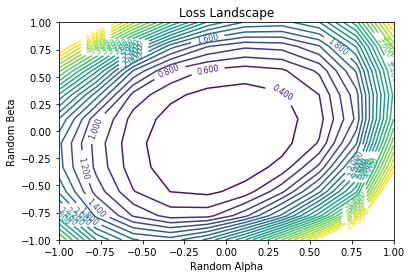

In [19]:
# two random direction (α,β) belong to [-1,1]

# reshape loss_grids
Loss_Acc_Acc = np.transpose(loss_grids, (2,0,1))

#plot contour plot
CS=plt.contour(alpha_list, beta_list, Loss_Acc_Acc[0], cmpa='summer', levels=np.arange(0.2, 5.0, 0.2))
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Loss Landscape")
plt.xlabel("Random Alpha" )
plt.ylabel("Random Beta")

plt.show()

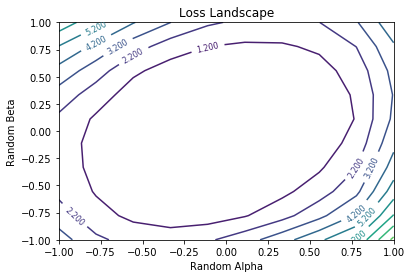

In [20]:
# two random direction(α,β) belong to[-2,2], enlarged

# reshape loss_grids
Loss_Acc_Acc = np.transpose(loss_grids, (2,0,1))

#plot contour plot
CS=plt.contour(alpha_list, beta_list, Loss_Acc_Acc[0], cmpa='summer', levels=np.arange(0.2, 12.5, 1))
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Loss Landscape")
plt.xlabel("Random Alpha" )
plt.ylabel("Random Beta")

plt.show()

## Evaluate hiden_neuron correlation

### Reference：
#### np.corrcoef： https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html

Neurons shape of each layer:
(5000, 100) (5000, 30) (5000, 30) (5000, 30) (5000, 30) (5000, 30) (5000, 30) (5000, 30) (5000, 30) (5000, 10)

Neurons shape from all layers:
(350, 5000)
(350, 350)


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 0, 'Hidden Neuron Correlation')

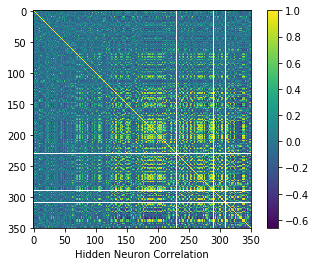

In [23]:
#retrive hiden_layer neurons from saved modle
Neurons_h1 = h_fc1.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h2 = h_fc2.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h3 = h_fc3.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h4 = h_fc4.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h5 = h_fc5.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h6 = h_fc6.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h7 = h_fc7.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h8 = h_fc8.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
Neurons_h9 = h_fc9.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
#Neurons_h10 = h_fc10.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })

Neurons_y = y.eval(feed_dict={ x: mnist.validation.images, y_: mnist.validation.labels })
print('Neurons shape of each layer:')
print(np.shape(Neurons_h1), np.shape(Neurons_h2),np.shape(Neurons_h3),np.shape(Neurons_h4),np.shape(Neurons_h5) ,np.shape(Neurons_h6),np.shape(Neurons_h7),np.shape(Neurons_h8),np.shape(Neurons_h9),np.shape(Neurons_y))
print('')

Neurons_all = np.concatenate((np.transpose(Neurons_h1), np.transpose(Neurons_h2),np.transpose(Neurons_h3),np.transpose(Neurons_h4),np.transpose(Neurons_h5),np.transpose(Neurons_h6),np.transpose(Neurons_h7),np.transpose(Neurons_h8),np.transpose(Neurons_h9), np.transpose(Neurons_y)))
print('Neurons shape from all layers:')
print (np.shape(Neurons_all))

neuron_corr = np.corrcoef(Neurons_all)
print(np.shape(neuron_corr))

plt.imshow(neuron_corr, cmap='viridis')
plt.colorbar()
plt.xlabel("Hidden Neuron Correlation")